In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

# Data Creation
For this simple task, we'll be creating our own example data set.

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.

The block of code below shows how to generate this dummy data.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

18
86
56
75
31
90
44
67
47
65
64
76
59
85
28
99
57
98
26
65
64
99
36
98
37
94
49
93
46
76
57
66
38
98
47
66
46
77
36
100
19
88
32
74
57
93
61
97
27
90
14
78
23
77
33
94
39
81
25
90
17
77
45
67
38
71
42
98
13
69
63
90
60
84
45
77
44
97
34
93
13
77
17
79
53
99
62
73
63
76
43
68
64
76
40
98
17
89
54
84
61
85
29
93
15
71
34
68
36
78
16
90
51
83
17
84
29
78
58
80
56
93
17
92
55
68
49
67
39
71
42
67
25
82
62
94
27
96
38
99
58
84
15
74
13
93
37
69
64
97
36
92
43
90
46
76
21
77
26
93
32
74
41
88
18
70
45
69
30
83
40
67
60
94
49
95
17
73
52
77
20
67
43
75
13
75
24
89
62
81
41
78
29
72
59
99
40
98
61
98
13
77
57
70
24
86
16
69
44
71
55
88
53
71
39
85
33
69
14
80
35
69
19
91
15
100
46
71
22
71
59
73
45
83
31
83
29
68
25
93
22
80
19
71
49
83
51
89
47
76
14
93
58
87
15
93
53
96
48
74
45
91
39
99
23
76
25
69
33
70
45
71
54
83
56
68
48
100
49
80
55
85
50
82
22
80
56
72
25
74
21
67
34
67
43
69
33
69
25
78
26
98
33
83
14
72
56
99
15
81
23
84
43
86
44
89
52
87
61
70
39
95
63
89
31
73
51
86
36
72
62
92
4

In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Data Processing
We now convert both lists into numpy arrays due to what we discussed the fit() function expects, and we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[0.87356322]
[0.97701149]
[0.35632184]
[0.1954023]
[0.28735632]
[0.97701149]
[0.22988506]
[0.59770115]
[0.34482759]
[0.94252874]
[0.89655172]
[0.65517241]
[0.56321839]
[0.73563218]
[0.82758621]
[0.98850575]
[0.91954023]
[0.25287356]
[0.90804598]
[0.36781609]
[0.83908046]
[0.73563218]
[0.64367816]
[0.02298851]
[0.02298851]
[0.75862069]
[0.73563218]
[0.16091954]
[0.27586207]
[0.79310345]
[0.8045977]
[0.20689655]
[0.44827586]
[0.20689655]
[0.42528736]
[0.57471264]
[0.93103448]
[0.20689655]
[0.10344828]
[0.79310345]
[0.34482759]
[0.89655172]
[0.6091954]
[0.79310345]
[0.27586207]
[0.93103448]
[0.05747126]
[0.59770115]
[1.]
[0.13793103]
[0.37931034]
[0.34482759]
[0.95402299]
[0.20689655]
[0.28735632]
[0.4137931]
[0.6091954]
[0.70114943]
[0.29885057]
[0.93103448]
[0.7816092]
[0.73563218]
[0.98850575]
[0.75862069]
[0.98850575]
[0.87356322]
[0.02298851]
[0.8045977]
[0.50574713]
[0.56321839]
[0.16091954]
[0.11494253]
[0.8045977]
[0.42528736]
[0.90804598]
[0.71264368]
[0.81609195]
[0.90804598]
[0

[0.94252874]
[0.94252874]
[0.74712644]
[0.96551724]
[0.55172414]
[0.88505747]
[0.51724138]
[0.09195402]
[0.82758621]
[0.51724138]
[0.96551724]
[0.70114943]
[0.16091954]
[0.35632184]
[0.]
[0.29885057]
[0.55172414]
[0.91954023]
[0.98850575]
[0.98850575]
[0.5862069]
[0.87356322]
[0.93103448]
[0.67816092]
[0.50574713]
[1.]
[0.27586207]
[0.73563218]
[0.73563218]
[0.16091954]
[0.77011494]
[0.68965517]
[0.82758621]
[0.29885057]
[0.33333333]
[0.3908046]
[0.09195402]
[0.32183908]
[0.04597701]
[0.95402299]
[0.81609195]
[0.57471264]
[0.65517241]
[0.50574713]
[0.47126437]
[0.71264368]
[0.90804598]
[0.74712644]
[0.48275862]
[0.17241379]
[0.06896552]
[0.74712644]
[0.33333333]
[0.49425287]
[0.68965517]
[0.81609195]
[0.89655172]
[0.45977011]
[0.70114943]
[0.35632184]
[0.22988506]
[0.03448276]
[0.82758621]
[0.47126437]
[0.59770115]
[0.42528736]
[0.95402299]
[0.88505747]
[0.87356322]
[0.3908046]
[0.27586207]
[0.74712644]
[0.29885057]
[0.34482759]
[0.88505747]
[0.44827586]
[0.7816092]
[0.06896552]
[0.287

[0.11494253]
[0.02298851]
[0.]
[0.67816092]
[0.62068966]
[0.18390805]
[0.7816092]
[0.95402299]
[0.26436782]
[0.73563218]
[0.83908046]
[0.87356322]
[0.48275862]
[0.49425287]
[0.63218391]
[0.22988506]
[0.35632184]
[0.50574713]
[0.94252874]
[0.20689655]
[0.51724138]
[0.52873563]
[0.47126437]
[0.40229885]
[0.98850575]
[0.50574713]
[0.79310345]
[0.43678161]
[0.59770115]
[0.48275862]
[0.83908046]
[0.35632184]
[0.28735632]
[0.34482759]
[0.02298851]
[0.8045977]
[0.57471264]
[0.35632184]
[0.01149425]
[0.2183908]
[0.79310345]
[0.18390805]
[0.59770115]
[0.88505747]
[0.79310345]
[0.87356322]
[0.27586207]
[0.90804598]
[0.01149425]
[0.22988506]
[0.77011494]
[0.29885057]
[0.32183908]
[0.31034483]
[0.08045977]
[0.25287356]
[0.1954023]
[0.66666667]
[0.11494253]
[0.45977011]
[0.62068966]
[0.20689655]
[0.54022989]
[0.25287356]
[0.93103448]
[0.95402299]
[0.70114943]
[0.66666667]
[0.40229885]
[0.8045977]
[0.5862069]
[0.45977011]
[0.64367816]
[0.45977011]
[0.11494253]
[0.02298851]
[0.75862069]
[0.75862069]


# Simple tf.keras Sequential model 

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Train on 2100 samples
Epoch 1/30
2100/2100 - 2s - loss: 0.7215 - accuracy: 0.4686
Epoch 2/30
2100/2100 - 0s - loss: 0.6842 - accuracy: 0.6176
Epoch 3/30
2100/2100 - 0s - loss: 0.6520 - accuracy: 0.7138
Epoch 4/30
2100/2100 - 0s - loss: 0.6226 - accuracy: 0.7305
Epoch 5/30
2100/2100 - 1s - loss: 0.5925 - accuracy: 0.7600
Epoch 6/30
2100/2100 - 0s - loss: 0.5622 - accuracy: 0.7857
Epoch 7/30
2100/2100 - 0s - loss: 0.5318 - accuracy: 0.8138
Epoch 8/30
2100/2100 - 0s - loss: 0.5020 - accuracy: 0.8314
Epoch 9/30
2100/2100 - 0s - loss: 0.4733 - accuracy: 0.8443
Epoch 10/30
2100/2100 - 0s - loss: 0.4466 - accuracy: 0.8638
Epoch 11/30
2100/2100 - 0s - loss: 0.4222 - accuracy: 0.8800
Epoch 12/30
2100/2100 - 1s - loss: 0.4006 - accuracy: 0.8867
Epoch 13/30
2100/2100 - 1s - loss: 0.3813 - accuracy: 0.8910
Epoch 14/30
2100/2100 - 1s - loss: 0.3642 - accuracy: 0.9024
Epoch 15/30
2100/2100 - 0s - loss: 0.3494 - accuracy: 0.9071
Epoch 16/30
2100/2100 - 0s - loss: 0.3365 - accuracy: 0.9100
Epoch 17/30

# Create Validation Set With Keras

In [14]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.2651 - accuracy: 0.9386 - val_loss: 0.2811 - val_accuracy: 0.9286
Epoch 2/30
1890/1890 - 0s - loss: 0.2638 - accuracy: 0.9386 - val_loss: 0.2796 - val_accuracy: 0.9286
Epoch 3/30
1890/1890 - 1s - loss: 0.2625 - accuracy: 0.9386 - val_loss: 0.2781 - val_accuracy: 0.9286
Epoch 4/30
1890/1890 - 0s - loss: 0.2615 - accuracy: 0.9386 - val_loss: 0.2779 - val_accuracy: 0.9286
Epoch 5/30
1890/1890 - 1s - loss: 0.2605 - accuracy: 0.9386 - val_loss: 0.2760 - val_accuracy: 0.9286
Epoch 6/30
1890/1890 - 1s - loss: 0.2596 - accuracy: 0.9386 - val_loss: 0.2747 - val_accuracy: 0.9286
Epoch 7/30
1890/1890 - 0s - loss: 0.2587 - accuracy: 0.9386 - val_loss: 0.2738 - val_accuracy: 0.9286
Epoch 8/30
1890/1890 - 0s - loss: 0.2579 - accuracy: 0.9386 - val_loss: 0.2732 - val_accuracy: 0.9286
Epoch 9/30
1890/1890 - 0s - loss: 0.2571 - accuracy: 0.9386 - val_loss: 0.2715 - val_accuracy: 0.9286
Epoch 10/30
1890/1890 - 0s - loss: 

# create test data 

In [15]:
test_labels = []
test_samples = []

In [17]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Evaluating The Test Set
To get predictions from the model for the test set, we call model.predict().

In [19]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [20]:
for i in predictions:
    print(i)

[0.67095214 0.3290479 ]
[0.02457439 0.97542566]
[0.36302823 0.63697183]
[0.24813905 0.7518609 ]
[0.18652149 0.81347847]
[0.05780002 0.94219995]
[0.40609342 0.5939066 ]
[0.8352116  0.16478841]
[0.01668042 0.9833196 ]
[0.9740518  0.02594821]
[0.9738246  0.02617534]
[0.9737961  0.02620387]
[0.01129286 0.9887072 ]
[0.8352116  0.16478841]
[0.03966709 0.96033293]
[0.06956029 0.9304397 ]
[0.92983377 0.07016625]
[0.01245198 0.987548  ]
[0.67095214 0.3290479 ]
[0.9739952  0.02600482]
[0.01513371 0.98486626]
[0.24813905 0.7518609 ]
[0.02025413 0.9797459 ]
[0.9729446  0.02705539]
[0.97396684 0.02603315]
[0.9731059  0.02689404]
[0.01838225 0.98161775]
[0.05780002 0.94219995]
[0.04792561 0.95207435]
[0.80859673 0.19140331]
[0.9741082  0.02589173]
[0.7098387 0.2901613]
[0.07623892 0.92376107]
[0.09138693 0.908613  ]
[0.04361016 0.95638984]
[0.01372842 0.9862716 ]
[0.9584226  0.04157744]
[0.40609342 0.5939066 ]
[0.97374207 0.02625791]
[0.1191851 0.8808149]
[0.97393847 0.02606153]
[0.05780002 0.942199

[0.97278225 0.02721769]
[0.05780002 0.94219995]
[0.58620125 0.41379875]
[0.87945026 0.12054981]
[0.97396684 0.02603315]
[0.09138693 0.908613  ]
[0.1191851 0.8808149]
[0.01129286 0.9887072 ]
[0.07623892 0.92376107]
[0.97413653 0.02586353]
[0.1191851 0.8808149]
[0.1191851 0.8808149]
[0.18652149 0.81347847]
[0.97374207 0.02625791]
[0.93747157 0.06252848]
[0.9740518  0.02594821]
[0.04361016 0.95638984]
[0.28364426 0.7163558 ]
[0.01513371 0.98486626]
[0.9740235 0.0259765]
[0.01129286 0.9887072 ]
[0.45065272 0.5493472 ]
[0.9525563  0.04744371]
[0.01513371 0.98486626]
[0.05264458 0.94735545]
[0.8352116  0.16478841]
[0.02231231 0.97768766]
[0.28364426 0.7163558 ]
[0.9738816  0.02611837]
[0.9108582 0.0891418]
[0.02457439 0.97542566]
[0.7098387 0.2901613]
[0.9737961  0.02620387]
[0.16045071 0.8395493 ]
[0.9740801  0.02591996]
[0.80859673 0.19140331]
[0.9739101  0.02608994]
[0.541449 0.458551]
[0.05264458 0.94735545]
[0.04361016 0.95638984]
[0.10918902 0.8908109 ]
[0.97326636 0.02673362]
[0.83521

[0.541449 0.458551]
[0.9739952  0.02600482]
[0.541449 0.458551]
[0.74587005 0.25412992]
[0.08350126 0.9164988 ]
[0.01838225 0.98161775]
[0.9212647  0.07873527]
[0.9729446  0.02705539]
[0.97393847 0.02606153]
[0.18652149 0.81347847]
[0.21573994 0.7842601 ]
[0.9525563  0.04744371]
[0.01372842 0.9862716 ]
[0.1191851 0.8808149]
[0.02978812 0.97021186]
[0.05264458 0.94735545]
[0.14163135 0.8583686 ]
[0.08350126 0.9164988 ]
[0.1191851 0.8808149]
[0.02705943 0.97294056]
[0.02025413 0.9797459 ]
[0.97413653 0.02586353]
[0.05264458 0.94735545]
[0.05264458 0.94735545]
[0.28364426 0.7163558 ]
[0.1191851 0.8808149]
[0.03606711 0.96393293]
[0.9738246  0.02617534]
[0.03966709 0.96033293]
[0.08350126 0.9164988 ]
[0.9740801  0.02591996]
[0.01129286 0.9887072 ]
[0.9739952  0.02600482]
[0.67095214 0.3290479 ]
[0.36302823 0.63697183]
[0.62957394 0.37042612]
[0.01513371 0.98486626]
[0.28364426 0.7163558 ]
[0.97171855 0.02828143]
[0.87945026 0.12054981]
[0.9738816  0.02611837]
[0.62957394 0.37042612]
[0.972

In [25]:
rounded_predictions = np.argmax(predictions, axis=1)

for i in rounded_predictions:
    print(i)

0
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
1
1
1
0
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
1
1
0
0
1
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
1
0
1
1
1
1
0
0
1
0
0
1
1


# Confusion metrix

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [28]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[ 961   89]
 [  47 1003]]


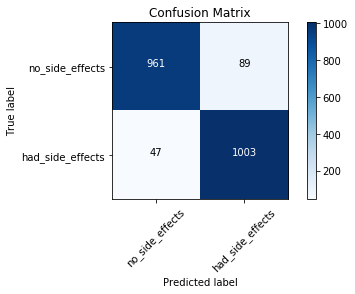

In [30]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving And Loading The Model In Its Entirety

In [32]:
model.save('medical_trial_model.h5')

In [34]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [35]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Saving And Loading Only The Architecture Of The Model

In [36]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [37]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [38]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Saving And Loading The Weights Of The Model

In [40]:
model.save_weights('my_model_weights.h5')

In [41]:
#since we saved only weights we need some architechture 
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [43]:
model2.load_weights('my_model_weights.h5')

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
